# Project_Attrition

###### This is a project done on a dataset of Verizonet, a telecommunications company based in California, that has been operating for six years, providing phone and internet services to the customers across different cities.

##### This project is done to help the company to tackle down their customer attrition by helping them to understand the reason behind it and fix it  with suitable methods and ideas.

##### Customer attrition is the loss of customers due to some or other reason from a business. The reasons can vary from the quality of the service provided by the company to their customer relations.

###### Goal : The dataset is analyzed initially and factors driving the customer turnover is identified. An accurate Machine Learning model is developed to predict the potential departures of the present customers and then recommend customized retention strategies.

In [4]:
# Importing main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing the csv dataset

df = pd.read_csv('verizonet_data.csv')
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN


The data consist of 7043 rows and 43 columns

In [6]:
df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Zip Code',
       'Population', 'Churn Status', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [8]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


We can see that out of 7043 customers only 1834 customers have opted to rate the service and 5209 customers did not give any rating. This could be because some of them are not at all happy with the service provided by the company. And from the total rating, the average rating is only 3.0 which also shows the customers dissatisfaction with the services they got.

In [9]:
df.shape

(7043, 43)

In [10]:
## Dropping the column 'Customer ID'
df.drop('Customer ID',axis=1,inplace=True) #This code is working but is error because i ran this line two times 

We can drop the column 'Customer ID' since it has no role in our models

In [11]:
df.head(5)

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


In [12]:
## Finding the missing values
df.isnull().sum()

Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges                   0
Total Refunds                     

In [13]:
# Handling missing values in 'Offer'
df['Offer'].value_counts()

Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

In [14]:
df['Offer'].mode()

0    Offer B
Name: Offer, dtype: object

In [15]:
df['Offer'].mode()[0]

'Offer B'

In [16]:
df['Offer'].fillna(df['Offer'].mode()[0],inplace=True)

In [17]:
df.head(5)

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,No,0,1,Offer B,No,0.00,No,Yes,Fiber Optic,9,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


The null values are replaced with most frequently used one

In [18]:
# Handling missing values in 'Internet Type'
df['Internet Type'].value_counts()

Internet Type
Fiber Optic    2291
DSL            1680
Cable          1546
Name: count, dtype: int64

In [19]:
df['Internet Type'].mode()

0    Fiber Optic
Name: Internet Type, dtype: object

In [20]:
df['Internet Type'].mode()[0]

'Fiber Optic'

In [21]:
df['Internet Type'].fillna(df['Internet Type'].mode()[0],inplace=True)

In [22]:
## Checking if the null values are changed
df[df['Offer'].isnull()]

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate


Mode is used here to repace the missing values

In [23]:
## Handling the misisng data in 'Customer Satisfaction rate'
df['Customer Satisfaction rate'].isnull().sum()

5209

In [24]:
df['Customer Satisfaction rate'].value_counts()

Customer Satisfaction rate
3.0    675
4.0    380
1.0    332
5.0    247
2.0    200
Name: count, dtype: int64

In [25]:
df['Customer Satisfaction rate'].fillna(df['Customer Satisfaction rate'].mean(),inplace=True)

In [26]:
df['Customer Satisfaction rate']=df['Customer Satisfaction rate'].round(1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      7043 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [28]:
df['Customer Satisfaction rate'].value_counts()

Customer Satisfaction rate
3.0    5884
4.0     380
1.0     332
5.0     247
2.0     200
Name: count, dtype: int64

In [29]:
df[df['Customer Satisfaction rate'].isnull()]

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate


The mean value is used to replace the missing values

In [30]:
df['Churn Category'].value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

In [31]:
df['Churn Category'].isnull().sum()

5174

In [32]:
df['Churn Category'].fillna(df['Churn Category'].mode()[0],inplace=True)

In [33]:
df

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,No,0,1,Offer B,No,0.00,No,Yes,Fiber Optic,9,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,3.0
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,3.0
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,3.0
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,72,Offer B,Yes,22.77,No,No,Fiber Optic,0,...,Landers,92285,2182,0,5306,Competitor,NaN,0,0,3.0
7039,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,24,...,Adelanto,92301,18980,0,2140,Competitor,NaN,2,0,3.0
7040,Yes,4,72,Offer B,Yes,29.66,Yes,Yes,Cable,59,...,Amboy,92304,42,0,5560,Competitor,NaN,2,0,4.0
7041,Yes,1,11,Offer B,No,0.00,No,Yes,DSL,17,...,Angelus Oaks,92305,301,0,2793,Competitor,NaN,0,0,3.0


Mode is used to replace the missing values

In [34]:
df['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [35]:
df['Churn Reason'].isnull().sum()

5174

In [36]:
df['Churn Reason'].fillna(df['Churn Reason'].mode()[0],inplace=True)

In [37]:
df['Churn Reason'].isnull().sum()

0

Mode is used to replace the missing values

In [38]:
df.isnull().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charg

Now all the missing values are replaced with the appropriate data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      7043 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [40]:
# Finding top 10 Cities with the most number of customers
city_name=df.City.value_counts().index
city_name

Index(['Los Angeles', 'San Diego', 'San Jose', 'Sacramento', 'San Francisco',
       'Fresno', 'Long Beach', 'Oakland', 'Escondido', 'Stockton',
       ...
       'Borrego Springs', 'Homewood', 'Green Valley Lake', 'Tahoe City',
       'Likely', 'Jacumba', 'South Lake Tahoe', 'Johannesburg', 'Eldridge',
       'Holtville'],
      dtype='object', name='City', length=1106)

In [41]:
city_value=df.City.value_counts().values
city_value

array([293, 285, 112, ...,   2,   2,   2], dtype=int64)

([<matplotlib.patches.Wedge at 0x254a1eaae50>,
 [Text(0.5752383739751077, 0.9376037612480413, 'Los Angeles'),
  Text(-1.0935945229373867, 0.11853699591836163, 'San Diego'),
  Text(-0.32091685059533614, -1.0521465558580567, 'San Jose'),
  Text(0.49836509178577737, -0.9806284899437472, 'Sacramento'),
  Text(1.0286222964154792, -0.3897899066381099, 'San Francisco')],
 [Text(0.3137663858046042, 0.5114202334080226, '32.48%'),
  Text(-0.5965061034203927, 0.06465654322819725, '31.60%'),
  Text(-0.17504555487018333, -0.5738981213771218, '12.42%'),
  Text(0.271835504610424, -0.5348882672420439, '11.97%'),
  Text(0.5610667071357158, -0.21261267634805994, '11.53%')])

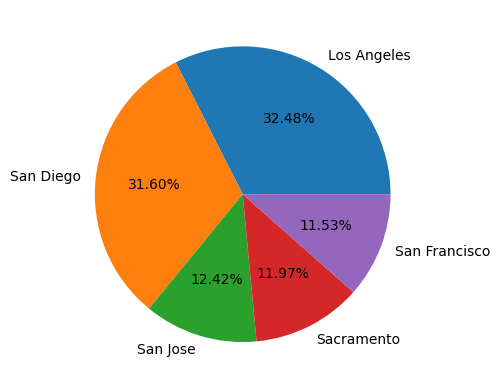

In [42]:
plt.pie(x=city_value[:5],labels=city_name[:5],autopct='%1.2f%%')

This pie chart shows the top ten cities in terms of the no.of customers.

From the plot it is clear that LA has most number of customers followed by San Diego, San Jose, Sacramento and San Francisco. 

<Axes: xlabel='Internet Service', ylabel='count'>

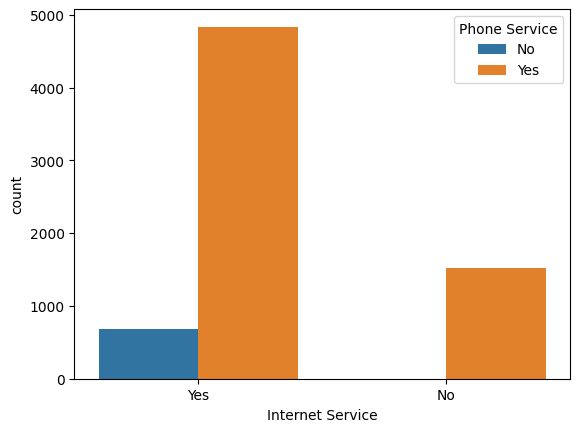

In [43]:
sns.countplot(x='Internet Service',hue='Phone Service',data=df)

Observations: Almost 5000 customers who use the phone service are making use of the Internet Service. And less than 1000 customers use Internet Service, but don't use Phone Service. More than 1000 customers who use Phone Service do not use Internet Service.

<Axes: xlabel='Online Security', ylabel='count'>

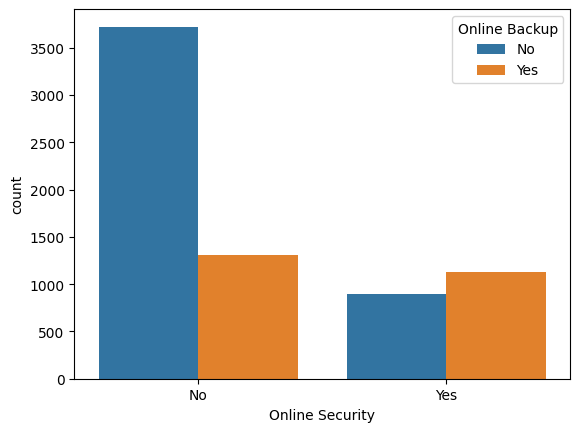

In [44]:
sns.countplot(x='Online Security',hue='Online Backup',data=df)

Observations: This shows that the almost 70 percentage of the customers don't have online security. Out of them more than 3500 customers do not have a online backup with them. Also it is clear that more than 1000 customers who have online security also have online backup.

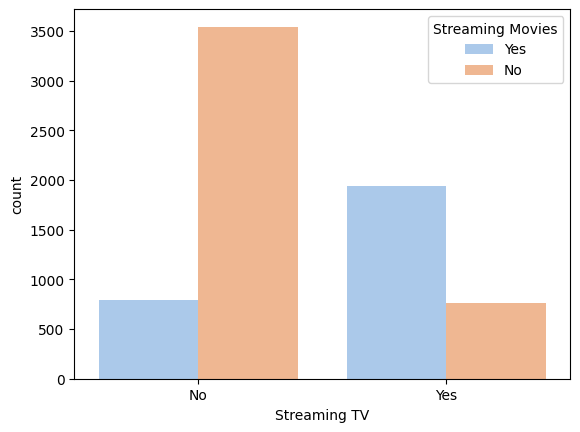

In [45]:
sns.countplot(x='Streaming TV', hue='Streaming Movies', data=df, palette='pastel')
plt.show()

Observations: From the visualization we can understand that more than 4000 customers dont use the feature 'Streaming TV' and only less than 1000 customers the feature of 'Streaming Movies'. Also around 2500 customers have the feature of 'Streaming TV' and more than 1500 of them use 'Streaming Movies' feature.

<Axes: xlabel='Internet Service', ylabel='count'>

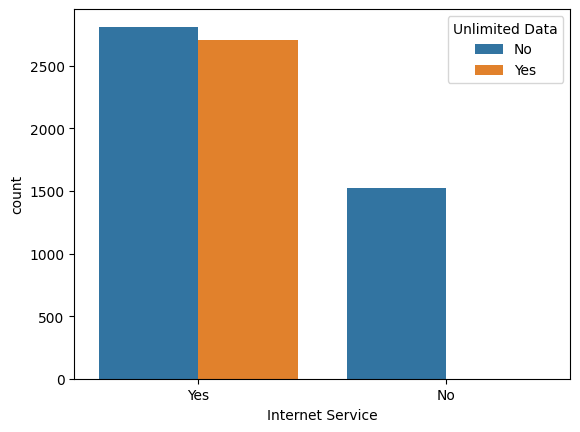

In [46]:
sns.countplot(x='Internet Service',hue='Unlimited Data', data=df)

Observations: More than 5000 customers use the 'Internet Service' and out of them, more than 2500 customers opted for 'Unlimited Data'. Around 1500 customers does not use the 'Internet Service'.

<Axes: xlabel='Contract', ylabel='count'>

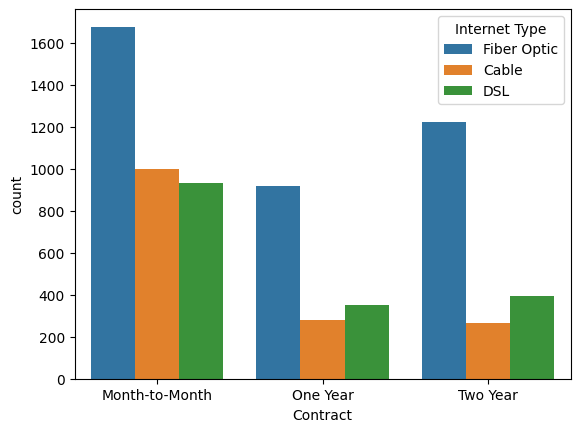

In [47]:
sns.countplot(x='Contract',hue='Internet Type',data=df)

Observations: From the visualization, we can understand that most of the cusotmers opt for month to month contract. Also, Fiber Optic is widely used among the customers irrespectiive of their Contract type.

<Axes: xlabel='Internet Service', ylabel='count'>

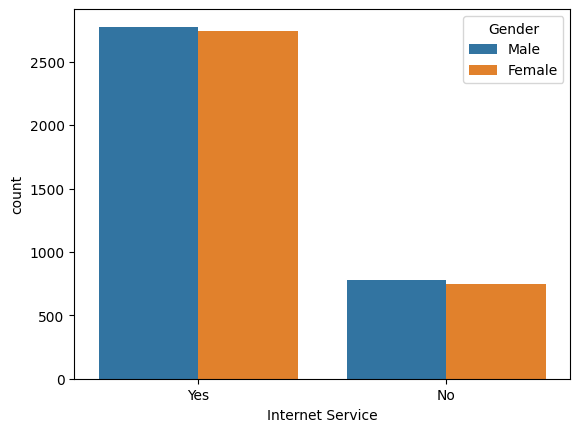

In [48]:
sns.countplot(x='Internet Service',hue='Gender',data=df)

Observation: With respect to the Gender, we can see that both male and female are equally using the Internet Service. More than 2500 male and female use Internet Seivice while less than 1000 male and female do not use the Internet Service.  

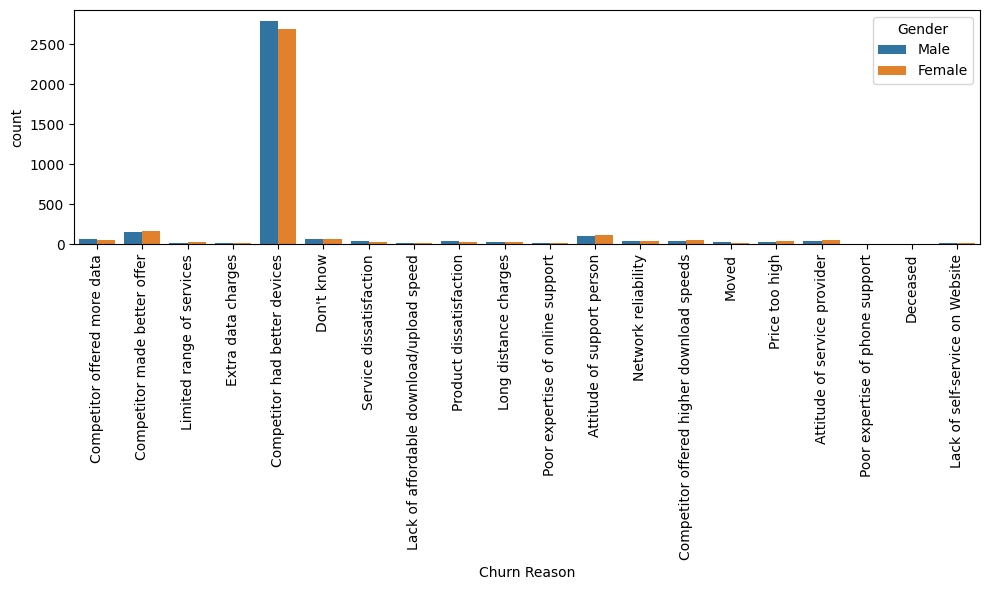

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x='Churn Reason',hue='Gender',data=df)
plt.xticks(rotation=90)
plt.tight_layout()

Observations: From the plotting, we can understand that the main reason for the churn is 'Competitor had better devices' and both male and female are almost equally churned with respect to this reason. Also remaining all the reasons are having low churn when compared to the main reason and this scenario also both male and female have almost same churn reasons.

In [51]:
# Grouping the Age to Categories
bins=[0,20,40,60,80]
labels=['0-20','21-40','41-60','61+']
df['Age Group']=pd.cut(df['Age'],bins=bins,labels=labels)

In [52]:
df['Age Group']

0         61+
1         61+
2         61+
3         61+
4         61+
        ...  
7038    21-40
7039    21-40
7040    21-40
7041    21-40
7042    41-60
Name: Age Group, Length: 7043, dtype: category
Categories (4, object): ['0-20' < '21-40' < '41-60' < '61+']

<Axes: xlabel='Churn Status', ylabel='count'>

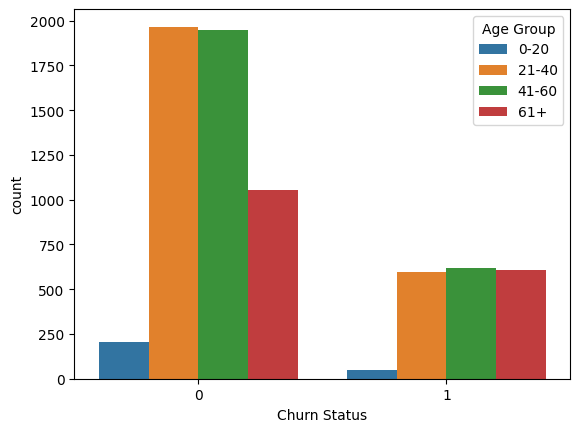

In [53]:
sns.countplot(x='Churn Status',hue='Age Group',data=df)

Observations: From the count plot we can see that more than 1500 customers have churned and they are splitted across the age group almost equally with around 500 customers from age group of 21-40, 41-60 and 61+. Age group of 0-20 have less number of customers churned. 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Referred a Friend                  7043 non-null   object  
 1   Number of Referrals                7043 non-null   int64   
 2   Tenure in Months                   7043 non-null   int64   
 3   Offer                              7043 non-null   object  
 4   Phone Service                      7043 non-null   object  
 5   Avg Monthly Long Distance Charges  7043 non-null   float64 
 6   Multiple Lines                     7043 non-null   object  
 7   Internet Service                   7043 non-null   object  
 8   Internet Type                      7043 non-null   object  
 9   Avg Monthly GB Download            7043 non-null   int64   
 10  Online Security                    7043 non-null   object  
 11  Online Backup                      7043 non

There are many data coumns which are not numerical. So we can do encoding to make them numerical.

## Label Encoding 

In [55]:
df['Referred a Friend'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
## Label encoding 'Referred a Friend'
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [57]:
df['Referred a Friend']=labelencoder.fit_transform(df['Referred a Friend'])

In [58]:
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate,Age Group
0,0,0,1,Offer B,No,0.00,No,Yes,Fiber Optic,9,...,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,3.0,61+
1,1,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,3.0,61+
2,0,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,3.0,61+
3,1,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,...,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0,61+
4,1,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,...,90602,26265,1,2793,Price,Extra data charges,1,0,2.0,61+


In [59]:
## Label encoding 'Offer' and 'Phone Service'
df['Offer']=labelencoder.fit_transform(df['Offer'])
df['Phone Service']=labelencoder.fit_transform(df['Offer'])

In [60]:
## Label encoding remaining categorical features

df['Multiple Lines']=labelencoder.fit_transform(df['Multiple Lines'])
df['Internet Type']=labelencoder.fit_transform(df['Internet Type'])

df['Online Security']=labelencoder.fit_transform(df['Online Security'])
df['Online Backup']=labelencoder.fit_transform(df['Online Backup'])

df['Device Protection Plan']=labelencoder.fit_transform(df['Device Protection Plan'])
df['Premium Tech Support']=labelencoder.fit_transform(df['Premium Tech Support'])

df['Streaming TV']=labelencoder.fit_transform(df['Streaming TV'])
df['Streaming Movies']=labelencoder.fit_transform(df['Streaming Music'])
df['Streaming Music']=labelencoder.fit_transform(df['Streaming Music'])

df['Unlimited Data']=labelencoder.fit_transform(df['Unlimited Data'])
df['Contract']=labelencoder.fit_transform(df['Contract'])

df['Paperless Billing']=labelencoder.fit_transform(df['Paperless Billing'])
df['Payment Method']=labelencoder.fit_transform(df['Payment Method'])

df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Under 30']=labelencoder.fit_transform(df['Under 30'])
df['Senior Citizen']=labelencoder.fit_transform(df['Senior Citizen'])

df['Married']=labelencoder.fit_transform(df['Married'])
df['Dependents']=labelencoder.fit_transform(df['Dependents'])

df['Churn Category']=labelencoder.fit_transform(df['Churn Category'])
df['Churn Reason']=labelencoder.fit_transform(df['Churn Reason'])
df['Age Group']=labelencoder.fit_transform(df['Age Group'])

In [61]:
df['Internet Service']=labelencoder.fit_transform(df['Internet Service'])

In [62]:
df['City']=labelencoder.fit_transform(df['City'])

In [63]:
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate,Age Group
0,0,0,1,1,1,0.00,0,1,2,9,...,90022,68701,1,5433,1,5,5,0,3.0,3
1,1,1,8,4,4,48.85,1,1,0,19,...,90063,55668,1,5302,1,3,5,0,3.0,3
2,0,0,18,3,3,11.33,1,1,2,57,...,90065,47534,1,3179,1,3,1,0,3.0,3
3,1,1,25,2,2,19.76,0,1,2,13,...,90303,27778,1,5337,2,11,1,1,2.0,3
4,1,1,37,2,2,6.33,1,1,0,15,...,90602,26265,1,2793,4,8,1,0,2.0,3


In [64]:
df.drop('Age',axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int32  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   int32  
 4   Phone Service                      7043 non-null   int64  
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   int32  
 7   Internet Service                   7043 non-null   int32  
 8   Internet Type                      7043 non-null   int32  
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   int32  
 11  Online Backup                      7043 non-null   int32

Now we have encoded all the categorical variables to numerical using label encoder.

In [66]:
# Splitting our dataset to dependent and independent features
X=df.drop('Churn Status',axis=1)

In [67]:
X

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate,Age Group
0,0,0,1,1,1,0.00,0,1,2,9,...,554,90022,68701,5433,1,5,5,0,3.0,3
1,1,1,8,4,4,48.85,1,1,0,19,...,554,90063,55668,5302,1,3,5,0,3.0,3
2,0,0,18,3,3,11.33,1,1,2,57,...,554,90065,47534,3179,1,3,1,0,3.0,3
3,1,1,25,2,2,19.76,0,1,2,13,...,448,90303,27778,5337,2,11,1,1,2.0,3
4,1,1,37,2,2,6.33,1,1,0,15,...,1072,90602,26265,2793,4,8,1,0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,1,1,22.77,0,0,2,0,...,514,92285,2182,5306,1,2,0,0,3.0,1
7039,1,1,24,2,2,36.05,1,1,1,24,...,2,92301,18980,2140,1,2,2,0,3.0,1
7040,1,4,72,1,1,29.66,1,1,0,59,...,22,92304,42,5560,1,2,2,0,4.0,1
7041,1,1,11,1,1,0.00,0,1,1,17,...,26,92305,301,2793,1,2,0,0,3.0,1


In [68]:
y=df['Churn Status']

In [69]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

## Feature Selection

In [76]:
## Feature selection based on correlation
df.corr()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate,Age Group
Referred a Friend,1.000000,0.708291,0.361844,-0.210080,-0.210080,0.008702,0.132641,0.002842,0.041501,0.046215,...,-0.000907,-0.001832,-0.149122,0.125249,-0.058450,-0.067887,-0.091165,-0.055105,0.069969,-0.005576
Number of Referrals,0.708291,1.000000,0.326975,-0.188738,-0.188738,0.006336,0.078080,-0.038984,0.094077,0.024131,...,0.001463,-0.007704,-0.286540,0.122843,-0.101787,-0.145782,-0.140121,-0.112472,0.132182,-0.027505
Tenure in Months,0.361844,0.326975,1.000000,-0.564574,-0.564574,0.014596,0.332101,0.038582,0.054212,0.031410,...,0.007146,-0.012102,-0.352861,0.396292,-0.115745,-0.177144,-0.200989,-0.155561,0.155862,0.010997
Offer,-0.210080,-0.188738,-0.564574,1.000000,1.000000,0.003951,-0.185937,-0.023579,-0.038160,-0.010861,...,-0.007005,0.005952,0.208877,-0.192785,0.048597,0.079151,0.128028,0.073207,-0.083625,-0.009518
Phone Service,-0.210080,-0.188738,-0.564574,1.000000,1.000000,0.003951,-0.185937,-0.023579,-0.038160,-0.010861,...,-0.007005,0.005952,0.208877,-0.192785,0.048597,0.079151,0.128028,0.073207,-0.083625,-0.009518
Avg Monthly Long Distance Charges,0.008702,0.006336,0.014596,0.003951,0.003951,1.000000,0.136004,-0.068605,0.009008,-0.029658,...,0.005894,-0.018665,0.008120,0.023858,-0.005774,-0.009705,0.016678,-0.001392,0.001423,-0.009978
Multiple Lines,0.132641,0.078080,0.332101,-0.185937,-0.185937,0.136004,1.000000,0.210564,-0.112041,0.092022,...,-0.021183,0.003755,0.040102,0.133568,0.032102,0.035020,0.035677,0.021083,-0.031483,0.098118
Internet Service,0.002842,-0.038984,0.038582,-0.023579,-0.023579,-0.068605,0.210564,1.000000,-0.439464,0.530043,...,-0.016755,0.013534,0.227890,0.011521,0.070628,0.119605,0.122636,0.106724,-0.129440,0.102973
Internet Type,0.041501,0.094077,0.054212,-0.038160,-0.038160,0.009008,-0.112041,-0.439464,1.000000,-0.228779,...,0.004875,-0.009279,-0.338944,0.027514,-0.111891,-0.184662,-0.181591,-0.158569,0.163236,-0.068586
Avg Monthly GB Download,0.046215,0.024131,0.031410,-0.010861,-0.010861,-0.029658,0.092022,0.530043,-0.228779,1.000000,...,-0.012029,0.027487,0.094932,0.016595,0.009993,0.044286,0.064806,0.048205,-0.048267,-0.331886


<Axes: >

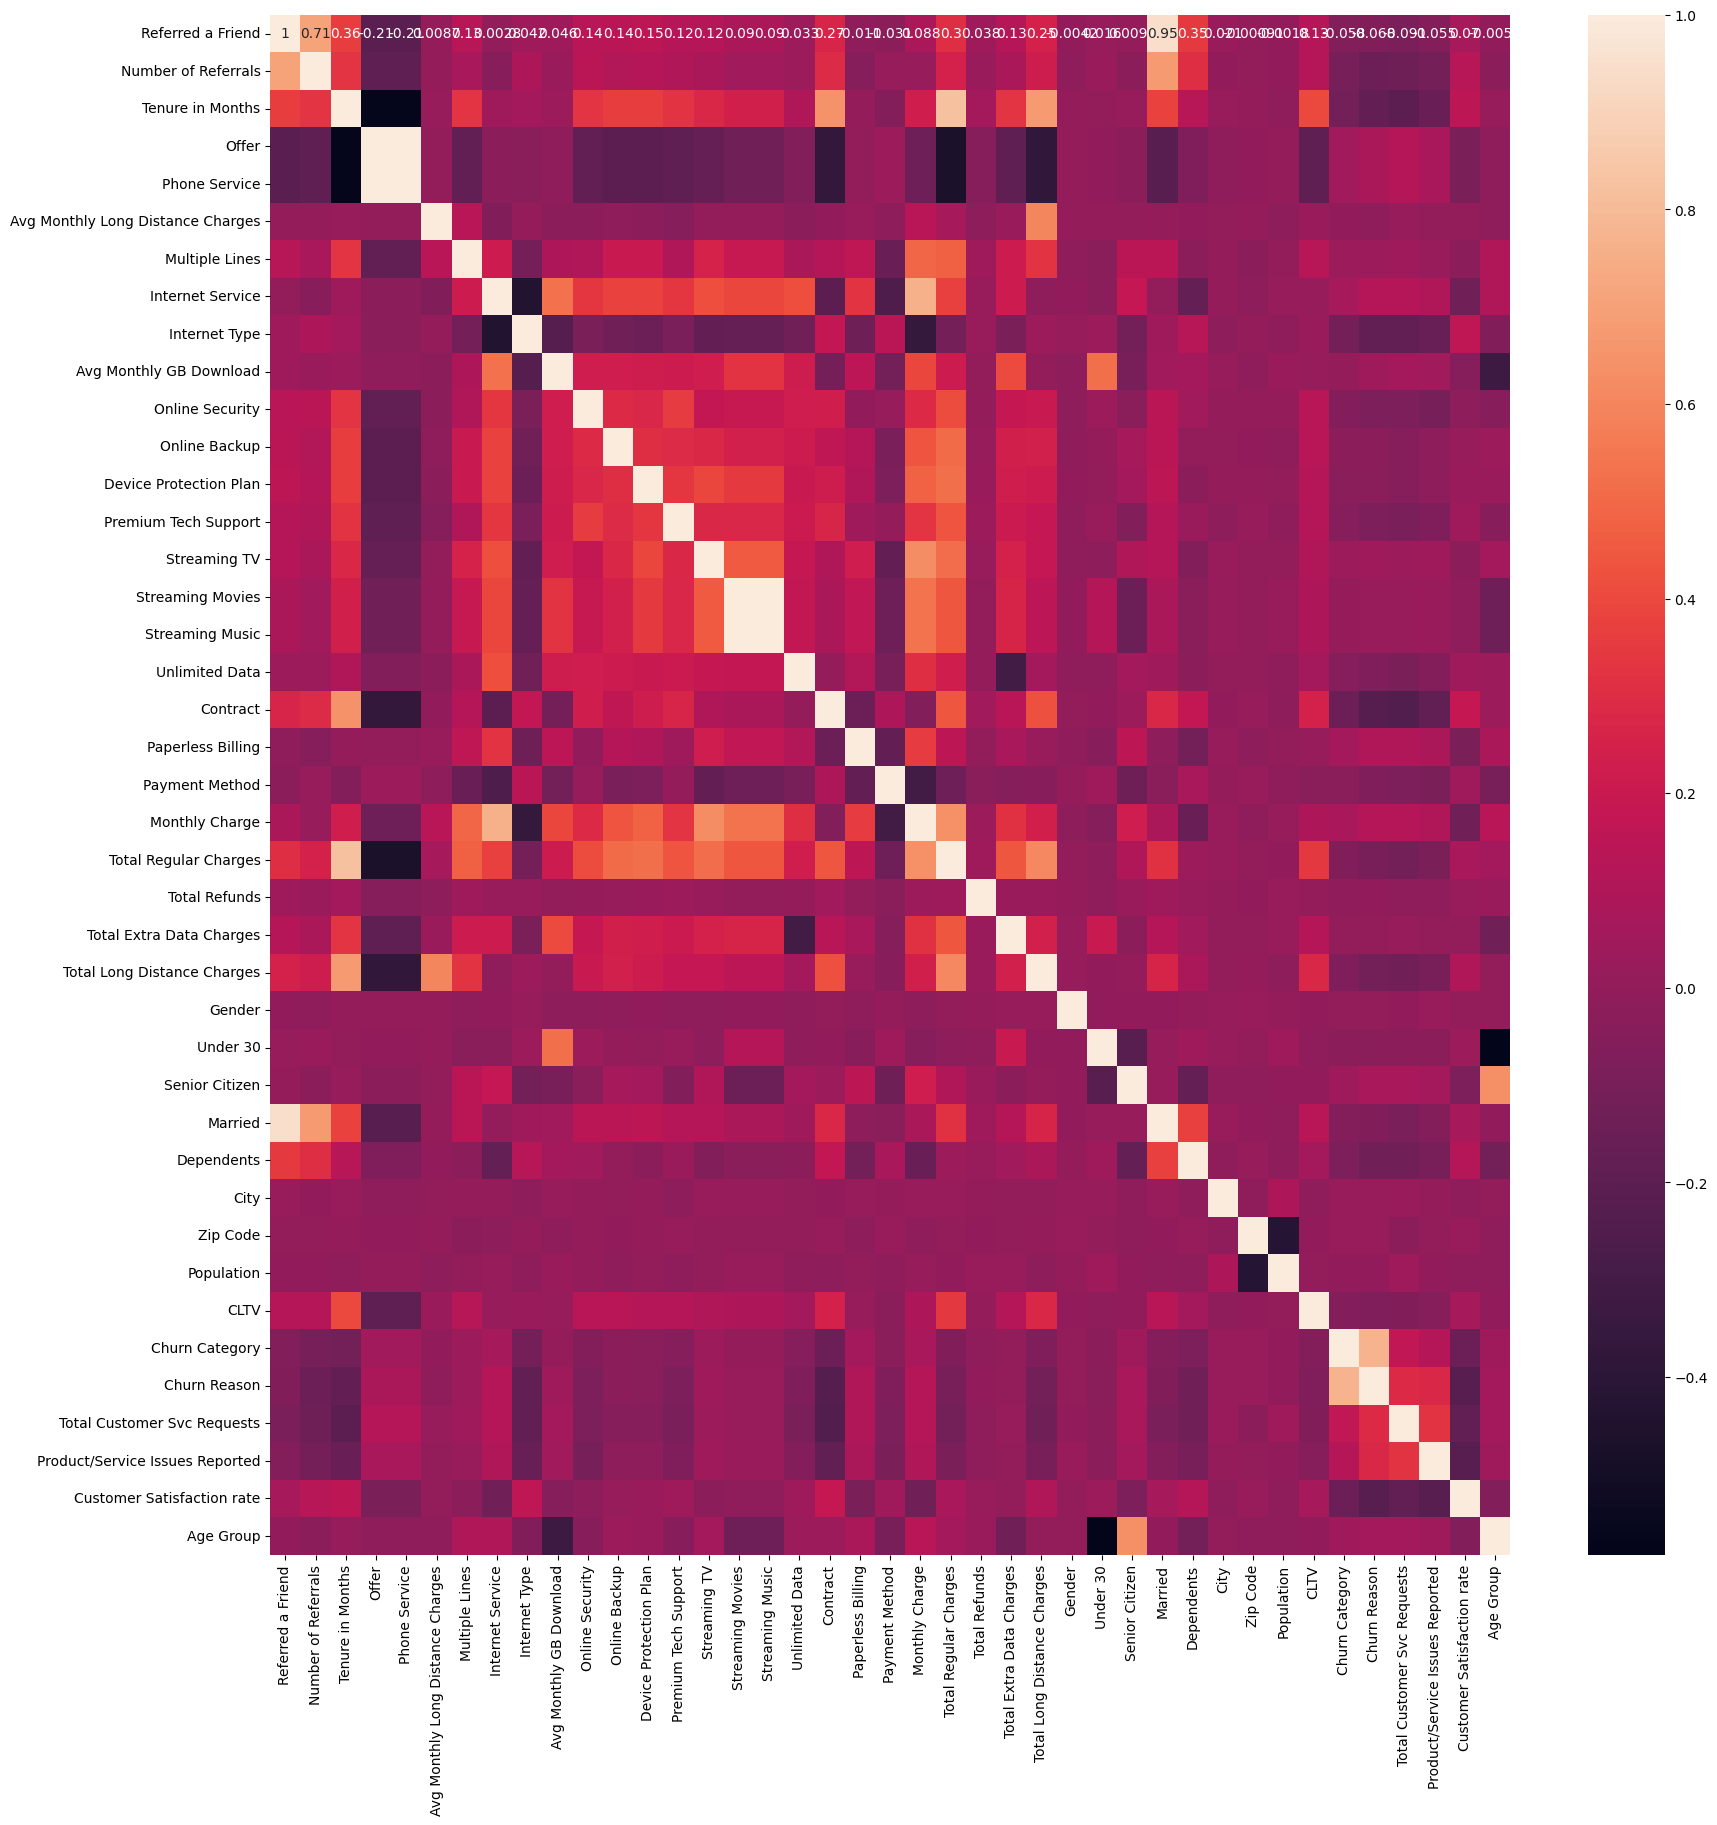

In [77]:
## This brings correlation between the independant variables only
import seaborn as sns
column_to_exclude = 'Churn Status'

columns_to_include = df.columns[df.columns != column_to_exclude]

corr = df[columns_to_include].corr()

top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

From the heatmap since there are lot of data in here, it is difficult to have some readings from it. But let us now find highly correlated features from them and remove them so that our model work efficiently.

In [70]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [71]:
## Threshold setting
corr_features=correlation(X,0.6)

In [72]:
corr_features

{'Age Group',
 'Churn Reason',
 'Contract',
 'Married',
 'Monthly Charge',
 'Number of Referrals',
 'Phone Service',
 'Streaming Music',
 'Total Long Distance Charges',
 'Total Regular Charges'}

Now we have got some highly correlated features from the heatmap when we set the threshold to 60%. We will drop them in the upcoming steps.

In [73]:
df

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate,Age Group
0,0,0,1,1,1,0.00,0,1,2,9,...,90022,68701,1,5433,1,5,5,0,3.0,3
1,1,1,8,4,4,48.85,1,1,0,19,...,90063,55668,1,5302,1,3,5,0,3.0,3
2,0,0,18,3,3,11.33,1,1,2,57,...,90065,47534,1,3179,1,3,1,0,3.0,3
3,1,1,25,2,2,19.76,0,1,2,13,...,90303,27778,1,5337,2,11,1,1,2.0,3
4,1,1,37,2,2,6.33,1,1,0,15,...,90602,26265,1,2793,4,8,1,0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,1,1,22.77,0,0,2,0,...,92285,2182,0,5306,1,2,0,0,3.0,1
7039,1,1,24,2,2,36.05,1,1,1,24,...,92301,18980,0,2140,1,2,2,0,3.0,1
7040,1,4,72,1,1,29.66,1,1,0,59,...,92304,42,0,5560,1,2,2,0,4.0,1
7041,1,1,11,1,1,0.00,0,1,1,17,...,92305,301,0,2793,1,2,0,0,3.0,1


In [74]:
## Drop this features with high correlation
df=df.drop(corr_features,axis=1)

In [75]:
df

,Referred a Friend,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,...,Dependents,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,0,1,1,0.00,0,1,2,9,0,0,...,0,554,90022,68701,1,5433,1,5,0,3.0
1,1,8,4,48.85,1,1,0,19,0,1,...,1,554,90063,55668,1,5302,1,5,0,3.0
2,0,18,3,11.33,1,1,2,57,0,0,...,1,554,90065,47534,1,3179,1,1,0,3.0
3,1,25,2,19.76,0,1,2,13,0,1,...,1,448,90303,27778,1,5337,2,1,1,2.0
4,1,37,2,6.33,1,1,0,15,0,0,...,1,1072,90602,26265,1,2793,4,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,72,1,22.77,0,0,2,0,0,0,...,0,514,92285,2182,0,5306,1,0,0,3.0
7039,1,24,2,36.05,1,1,1,24,1,0,...,1,2,92301,18980,0,2140,1,2,0,3.0
7040,1,72,1,29.66,1,1,0,59,0,1,...,1,22,92304,42,0,5560,1,2,0,4.0
7041,1,11,1,0.00,0,1,1,17,1,0,...,1,26,92305,301,0,2793,1,0,0,3.0


Now we have dropped those highly correlated features from our dataframe.

In [76]:
X=X.drop(corr_features,axis=1)

In [77]:
X.shape

(7043, 31)

In [78]:
df.corr()

,Referred a Friend,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,...,Dependents,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
Referred a Friend,1.000000,0.361844,-0.210080,0.008702,0.132641,0.002842,0.041501,0.046215,0.139510,0.143177,...,0.346678,0.020929,-0.000907,-0.001832,-0.149122,0.125249,-0.058450,-0.091165,-0.055105,0.069969
Tenure in Months,0.361844,1.000000,-0.564574,0.014596,0.332101,0.038582,0.054212,0.031410,0.327543,0.360558,...,0.132081,0.017034,0.007146,-0.012102,-0.352861,0.396292,-0.115745,-0.200989,-0.155561,0.155862
Offer,-0.210080,-0.564574,1.000000,0.003951,-0.185937,-0.023579,-0.038160,-0.010861,-0.184844,-0.201338,...,-0.071516,-0.011343,-0.007005,0.005952,0.208877,-0.192785,0.048597,0.128028,0.073207,-0.083625
Avg Monthly Long Distance Charges,0.008702,0.014596,0.003951,1.000000,0.136004,-0.068605,0.009008,-0.029658,-0.028108,-0.013909,...,-0.005586,-0.000611,0.005894,-0.018665,0.008120,0.023858,-0.005774,0.016678,-0.001392,0.001423
Multiple Lines,0.132641,0.332101,-0.185937,0.136004,1.000000,0.210564,-0.112041,0.092022,0.098108,0.202237,...,-0.027510,0.009910,-0.021183,0.003755,0.040102,0.133568,0.032102,0.035677,0.021083,-0.031483
Internet Service,0.002842,0.038582,-0.023579,-0.068605,0.210564,1.000000,-0.439464,0.530043,0.333403,0.381593,...,-0.172110,0.007082,-0.016755,0.013534,0.227890,0.011521,0.070628,0.122636,0.106724,-0.129440
Internet Type,0.041501,0.054212,-0.038160,0.009008,-0.112041,-0.439464,1.000000,-0.228779,-0.083262,-0.119808,...,0.130609,-0.013933,0.004875,-0.009279,-0.338944,0.027514,-0.111891,-0.181591,-0.158569,0.163236
Avg Monthly GB Download,0.046215,0.031410,-0.010861,-0.029658,0.092022,0.530043,-0.228779,1.000000,0.222355,0.221057,...,0.062231,0.015221,-0.012029,0.027487,0.094932,0.016595,0.009993,0.064806,0.048205,-0.048267
Online Security,0.139510,0.327543,-0.184844,-0.028108,0.098108,0.333403,-0.083262,0.222355,1.000000,0.283832,...,0.050353,0.009040,0.009159,0.004770,-0.171226,0.138354,-0.051488,-0.080559,-0.103748,-0.016583
Online Backup,0.143177,0.360558,-0.201338,-0.013909,0.202237,0.381593,-0.119808,0.221057,0.283832,1.000000,...,0.003457,0.002920,-0.004058,-0.007786,-0.082255,0.138610,-0.029160,-0.048217,-0.017650,0.016561


<Axes: >

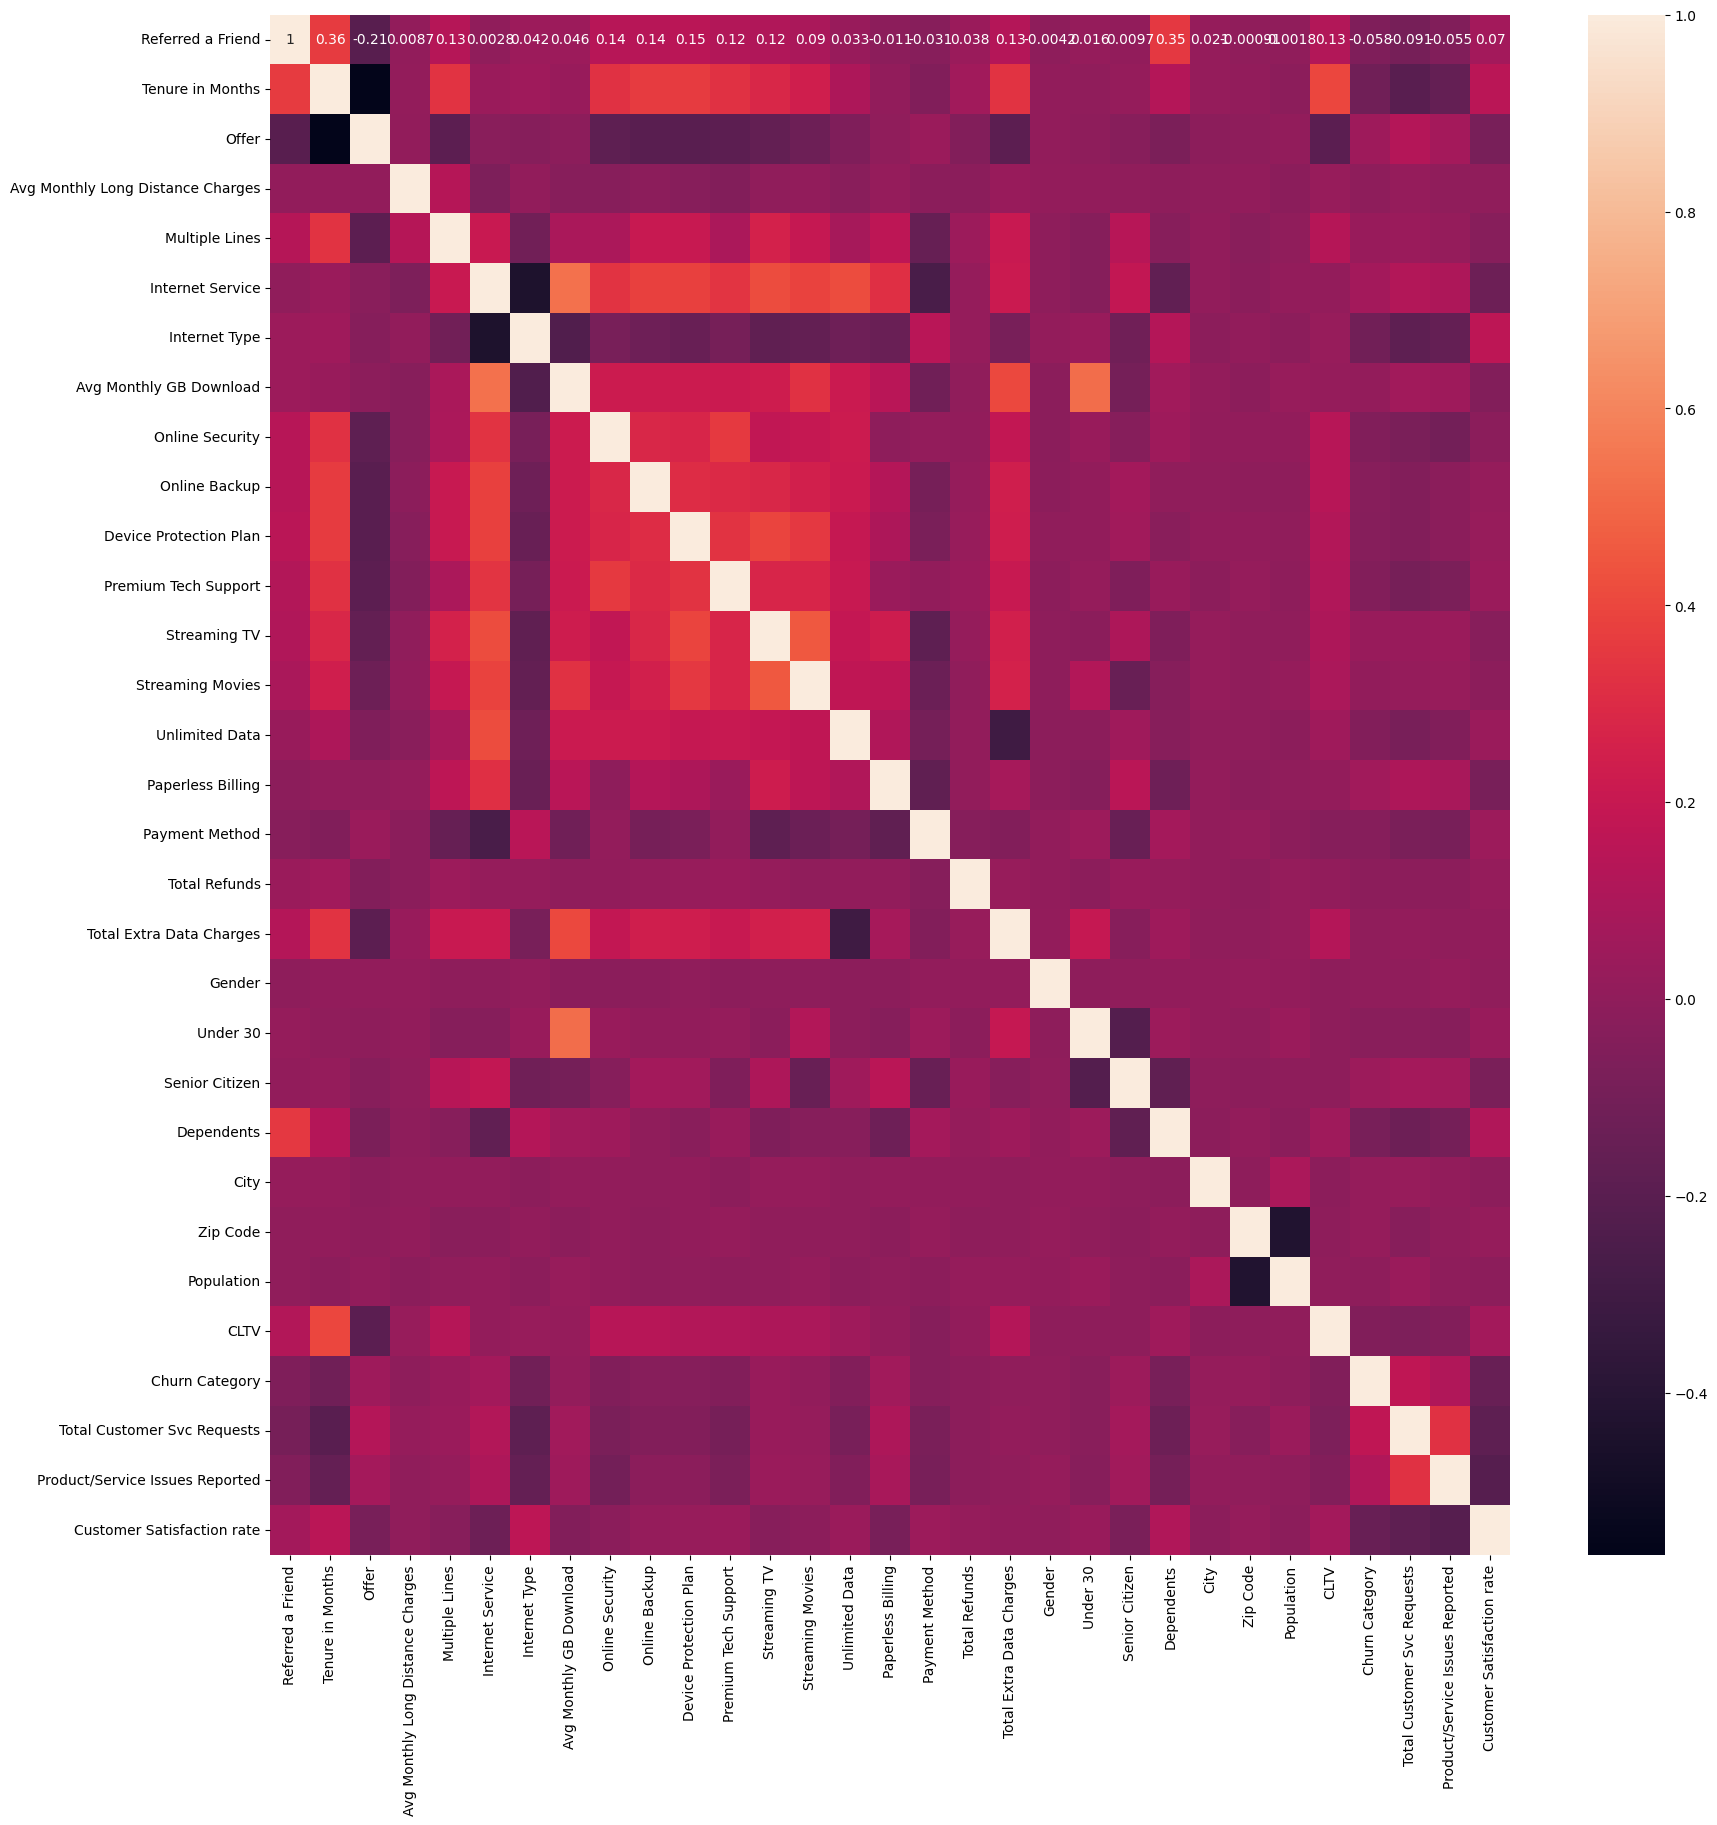

In [79]:
## This brings correlation between the independant variables only
import seaborn as sns
column_to_exclude = 'Churn Status'

columns_to_include = df.columns[df.columns != column_to_exclude]

corr = df[columns_to_include].corr()

top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

A heatmap is plotted after some of the correlated features are dropped.

Now we have more than 30 features. We have to consider some features which are having high relation with the target variable. So we are going to find out important features using ExtraTreesClassifier and plotting an horizontal bar graph of it.

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [81]:
# feature_importances_ prints the values of the features
print(model.feature_importances_)

[0.0113753  0.06173035 0.01877271 0.01800738 0.01057096 0.02049235
 0.06382577 0.01918774 0.0218639  0.01084551 0.00956397 0.01827874
 0.01003814 0.01078005 0.02814054 0.01714895 0.01634685 0.00589947
 0.01461416 0.01074763 0.00707746 0.01096548 0.02745574 0.0187334
 0.01895787 0.01868133 0.01960902 0.21905392 0.11226021 0.0560086
 0.09296653]


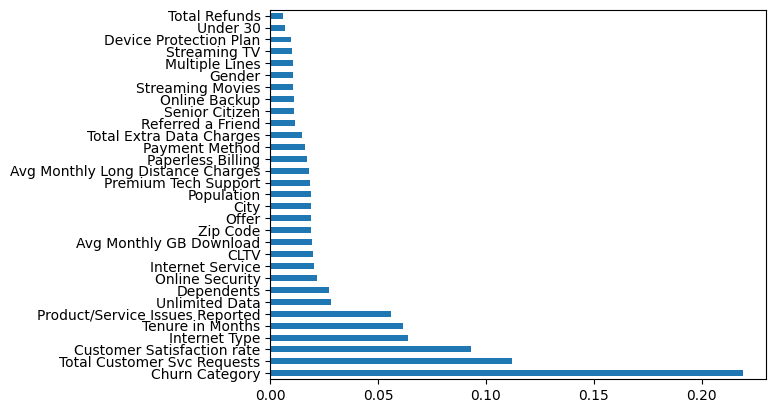

In [82]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
top=ranked_features.nlargest(32).plot(kind='barh')
plt.show()

We have got an horizontal bar plot showing the important features. Now we can consider this features for our model related works. As of now we will select 10 important features.

In [83]:
top_10_features = ranked_features.nlargest(10).index

In [84]:
top_10_features

Index(['Churn Category', 'Total Customer Svc Requests',
       'Customer Satisfaction rate', 'Internet Type', 'Tenure in Months',
       'Product/Service Issues Reported', 'Unlimited Data', 'Dependents',
       'Online Security', 'Internet Service'],
      dtype='object')

In [85]:
# Assigning this feature as our new X
X=X[top_10_features]

In [86]:
X

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
0,1,5,3.0,2,1,0,0,0,0,1
1,1,5,3.0,0,8,0,0,1,0,1
2,1,1,3.0,2,18,0,1,1,0,1
3,2,1,2.0,2,25,1,0,1,0,1
4,4,1,2.0,0,37,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,3.0,2,72,0,0,0,0,0
7039,1,2,3.0,1,24,0,1,1,1,1
7040,1,2,4.0,0,72,0,0,1,0,1
7041,1,0,3.0,1,11,0,1,1,1,1


In [87]:
X.shape,y.shape

((7043, 10), (7043,))

In [88]:
# Making our final_df with our new X and adding our dependent variable(Churn Status) to it.
final_df=df[list(X)+['Churn Status']]  

In [89]:
final_df

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service,Churn Status
0,1,5,3.0,2,1,0,0,0,0,1,1
1,1,5,3.0,0,8,0,0,1,0,1,1
2,1,1,3.0,2,18,0,1,1,0,1,1
3,2,1,2.0,2,25,1,0,1,0,1,1
4,4,1,2.0,0,37,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,3.0,2,72,0,0,0,0,0,0
7039,1,2,3.0,1,24,0,1,1,1,1,0
7040,1,2,4.0,0,72,0,0,1,0,1,0
7041,1,0,3.0,1,11,0,1,1,1,1,0


In [90]:
X

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
0,1,5,3.0,2,1,0,0,0,0,1
1,1,5,3.0,0,8,0,0,1,0,1
2,1,1,3.0,2,18,0,1,1,0,1
3,2,1,2.0,2,25,1,0,1,0,1
4,4,1,2.0,0,37,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,3.0,2,72,0,0,0,0,0
7039,1,2,3.0,1,24,0,1,1,1,1
7040,1,2,4.0,0,72,0,0,1,0,1
7041,1,0,3.0,1,11,0,1,1,1,1


In [91]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

## Splitting the Dataset

Now we will split our final_df to dependent and independent variables as X and y respectively.

In [92]:
X=final_df.drop('Churn Status',axis=1)

In [93]:
X

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
0,1,5,3.0,2,1,0,0,0,0,1
1,1,5,3.0,0,8,0,0,1,0,1
2,1,1,3.0,2,18,0,1,1,0,1
3,2,1,2.0,2,25,1,0,1,0,1
4,4,1,2.0,0,37,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,3.0,2,72,0,0,0,0,0
7039,1,2,3.0,1,24,0,1,1,1,1
7040,1,2,4.0,0,72,0,0,1,0,1
7041,1,0,3.0,1,11,0,1,1,1,1


In [94]:
X.shape

(7043, 10)

In [95]:
y=final_df['Churn Status']

In [96]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

In [97]:
y.shape

(7043,)

Now we will split our data to X_train, X_test, y_train, y_test using train_test_split.

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [100]:
X_train

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
3296,1,0,3.0,2,38,0,0,0,1,1
6397,1,0,3.0,2,35,0,0,1,0,0
6043,1,2,3.0,0,60,0,0,0,1,1
5309,1,3,3.0,2,40,0,1,1,1,1
3000,1,0,3.0,2,61,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4931,1,1,3.0,0,23,0,0,1,1,1
3264,1,2,3.0,2,71,0,0,1,0,0
1653,2,1,3.0,2,10,1,1,0,0,1
2607,1,0,3.0,2,72,0,0,0,0,0


In [101]:
X_test

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
2200,3,0,3.0,2,53,0,1,0,0,1
4627,1,2,3.0,2,65,0,0,1,0,0
3225,1,1,3.0,2,10,0,0,1,0,0
2828,1,0,3.0,2,61,0,0,0,0,0
3768,1,1,5.0,2,59,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3184,1,1,4.0,2,71,0,0,0,1,1
2551,1,2,3.0,1,49,0,1,1,1,1
5735,1,0,3.0,2,18,0,0,0,0,0
5096,1,1,3.0,2,37,0,0,0,1,1


In [102]:
y_train

3296    0
6397    0
6043    0
5309    0
3000    0
       ..
4931    0
3264    0
1653    1
2607    0
2732    0
Name: Churn Status, Length: 5282, dtype: int64

In [103]:
y_test

2200    1
4627    0
3225    0
2828    0
3768    0
       ..
3184    0
2551    0
5735    0
5096    0
450     1
Name: Churn Status, Length: 1761, dtype: int64

Now we have splitted the dataset to Training and Testing data

# Training the Dataset

We have now splitted the dataset using train_test_split. Let us now try to implement some algorithms to the dataset and train them.

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss

In [105]:
# Creating an object/ Model creation
model=LogisticRegression()

In [106]:
# Training the model on training data
model.fit(X_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
# Making the Predictions on testing data/ Testing
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

This is the prediction made by this model with respect to the given training data.

### Evaluating the model

In [110]:
#Accuracy score
accuracy=accuracy_score(y_test,y_pred)

In [113]:
print('Accuracy=', accuracy)

Accuracy= 0.9159568427030097


Observations: Using the LogisticRegression, we get the accuracy score as 91.5%.

In [114]:
# Classification Report
report= classification_report(y_test,y_pred)

In [115]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1294
           1       0.88      0.79      0.83       467

    accuracy                           0.92      1761
   macro avg       0.90      0.88      0.89      1761
weighted avg       0.91      0.92      0.91      1761



Observations: 

Precision: It is the ratio of correctly predicted positive observations to the total predicted positives. Precision is a measure of the accuracy of the positive predictions.

Precision for class 0: 93%  
Precision for class 1: 88%


Recall: The recall for each class is the ratio of correctly predicted positive observations to the total actual positives. Recall is a measure of the ability of the classifier to capture all the positive instances.

Recall for class 0: 96%  
Recall for class 1: 79%

F1-score: It is the harmonic mean of precision and recall. It provides a balance between precision and recall.

F1-score for class 0: 94%  
F1-score for class 1: 83%

Support: The number of actual occurrences of each class in the specified dataset.

Support for class 0: 1294  
Support for class 1: 467

Accuracy: The overall accuracy of the model on the entire dataset.

Accuracy: 92%

In [147]:
# Confusion matrix
cm=confusion_matrix(y_test,y_pred)

In [150]:
print(cm)

[[1244   50]
 [  94  373]]


Observations:

True Negative (TN): The number of instances correctly predicted as negative (class 0).  
False Negative (FN): The number of instances incorrectly predicted as negative (predicted class 0, actual class 1).  
False Positive (FP): The number of instances incorrectly predicted as positive (predicted class 1, actual class 0).  
True Positive (TP): The number of instances correctly predicted as positive (class 1).  

TN: 1244 (instances correctly predicted as class 0)  
FN: 94 (instances incorrectly predicted as class 0)   
FP: 50 (instances incorrectly predicted as class 1)    
TP: 373 (instances correctly predicted as class 1)  

In [116]:
# Checking the probability of class 1
y_prob=model.predict_proba(X_test)[:,1]

In [117]:
# Calculating the log loss
log_loss(y_test,y_prob)

0.210526799877419

Observations: From the log loss value(=0.2), we can understand that on average the model's predicted probabilities are close to the true labels and therefore has good accuracy(log_loss closer to 0 means good accuracy and closer to 1 means less accurate).

## Decision Tree Classifier 

In [118]:
final_df.head()

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service,Churn Status
0,1,5,3.0,2,1,0,0,0,0,1,1
1,1,5,3.0,0,8,0,0,1,0,1,1
2,1,1,3.0,2,18,0,1,1,0,1,1
3,2,1,2.0,2,25,1,0,1,0,1,1
4,4,1,2.0,0,37,0,0,1,0,1,1


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [120]:
final_df

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service,Churn Status
0,1,5,3.0,2,1,0,0,0,0,1,1
1,1,5,3.0,0,8,0,0,1,0,1,1
2,1,1,3.0,2,18,0,1,1,0,1,1
3,2,1,2.0,2,25,1,0,1,0,1,1
4,4,1,2.0,0,37,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,3.0,2,72,0,0,0,0,0,0
7039,1,2,3.0,1,24,0,1,1,1,1,0
7040,1,2,4.0,0,72,0,0,1,0,1,0
7041,1,0,3.0,1,11,0,1,1,1,1,0


In [121]:
X=final_df.drop('Churn Status', axis=1)

In [122]:
X

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
0,1,5,3.0,2,1,0,0,0,0,1
1,1,5,3.0,0,8,0,0,1,0,1
2,1,1,3.0,2,18,0,1,1,0,1
3,2,1,2.0,2,25,1,0,1,0,1
4,4,1,2.0,0,37,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,3.0,2,72,0,0,0,0,0
7039,1,2,3.0,1,24,0,1,1,1,1
7040,1,2,4.0,0,72,0,0,1,0,1
7041,1,0,3.0,1,11,0,1,1,1,1


In [123]:
y=final_df['Churn Status']

In [124]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=42)

In [126]:
X_train

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
6607,1,0,3.0,1,7,0,0,0,0,1
2598,1,0,3.0,2,71,0,1,0,1,1
2345,1,0,3.0,0,13,0,0,0,0,1
4093,1,1,3.0,2,17,0,1,0,0,1
693,1,1,3.0,0,40,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3772,1,1,3.0,2,1,0,0,0,0,0
5191,1,1,3.0,0,40,0,1,0,0,1
5226,1,1,3.0,2,21,0,1,1,0,1
5390,1,2,3.0,0,16,1,1,1,0,1


In [127]:
X_test

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
185,1,0,3.0,2,47,0,0,0,0,1
2715,1,1,4.0,2,50,0,0,0,0,0
3825,1,0,3.0,1,52,0,1,0,1,1
1807,0,2,3.0,2,11,0,0,1,0,0
132,1,3,3.0,2,13,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5845,1,1,3.0,0,65,0,1,0,1,1
2301,1,2,3.0,0,1,0,1,0,0,1
5121,1,2,5.0,2,2,0,1,0,0,1
677,1,0,3.0,2,11,0,1,0,0,1


In [128]:
y_train

6607    0
2598    0
2345    1
4093    0
693     0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Churn Status, Length: 5282, dtype: int64

In [129]:
y_test

185     1
2715    0
3825    0
1807    1
132     1
       ..
5845    0
2301    1
5121    0
677     0
6062    0
Name: Churn Status, Length: 1761, dtype: int64

#### Default Model

In [130]:
# Creating a Decision Tree Classifier
model=DecisionTreeClassifier()

# Training the model on the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
# Making the predictions on the test data
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

In [142]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score=', accuracy)

Accuracy score= 0.8801817149346962


Observations: Using the default DecisionTreeClassifier we get the accuracy score as 88%.

In [143]:
# Classification report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1263
           1       0.91      0.64      0.75       498

    accuracy                           0.88      1761
   macro avg       0.89      0.81      0.84      1761
weighted avg       0.88      0.88      0.87      1761



Observations:

Precision for class 0: 87%  
Precision for class 1: 91%  

Recall for class 0: 97%  
Recall for class 1: 64%  

F1-score for class 0: 92%  
F1-score for class 1: 75%  

Support for class 0: 1263  
Support for class 1: 498

Accuracy: 88%

In [144]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1231,   32],
       [ 179,  319]], dtype=int64)

Observations:

TN: 1231 (instances correctly predicted as class 0)  
FN: 179 (instances incorrectly predicted as class 0)   
FP: 32 (instances incorrectly predicted as class 1)    
TP: 319 (instances correctly predicted as class 1)  

Now let us do prepruning and evaluate the model

#### Prepruning

In [145]:
parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7],
    'max_features':['auto','sqrt','log2']
} 
from sklearn.model_selection import GridSearchCV

# Model Creation
model=DecisionTreeClassifier()

In [146]:
cv=GridSearchCV(model,parameter,scoring='accuracy')
cv.fit(X_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [147]:
best_model=cv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=7, max_features='sqrt')

The best_model has given a model. We now apply this model to the DecisionTreeClassifier.  

In [148]:
model=DecisionTreeClassifier(max_depth=7,max_features='sqrt')
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features='sqrt')

In [149]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

In [168]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score=', accuracy)

Accuracy score= 0.9420783645655877


Observations: When the DecisionTreeClassifier is done by best_model using the prepruning, we get accuracy = 92%, whereas in default DecisionTreeClassifier, it was 88% only.  

In [153]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1263
           1       0.92      0.78      0.84       498

    accuracy                           0.92      1761
   macro avg       0.92      0.87      0.89      1761
weighted avg       0.92      0.92      0.92      1761



Observations:

Precision for class 0: 92%  
Precision for class 1: 92%  

Recall for class 0: 97%  
Recall for class 1: 78%  

F1-score for class 0: 94%  
F1-score for class 1: 84%  

Support for class 0: 1263  
Support for class 1: 498

Accuracy: 92%

In [156]:
confusion_matrix(y_test,y_pred)

array([[1230,   33],
       [ 112,  386]], dtype=int64)

Observations:

TN: 1230 (instances correctly predicted as class 0)  
FN: 112 (instances incorrectly predicted as class 0)   
FP: 33 (instances incorrectly predicted as class 1)    
TP: 386 (instances correctly predicted as class 1)  

[Text(0.4583333333333333, 0.9375, 'x[0] <= 1.5\ngini = 0.384\nsamples = 5282\nvalue = [3911, 1371]'),
 Text(0.43452380952380953, 0.8125, 'x[2] <= 2.5\ngini = 0.292\nsamples = 4754\nvalue = [3911, 843]'),
 Text(0.4107142857142857, 0.6875, 'gini = 0.0\nsamples = 256\nvalue = [0, 256]'),
 Text(0.4583333333333333, 0.6875, 'x[5] <= 1.5\ngini = 0.227\nsamples = 4498\nvalue = [3911, 587]'),
 Text(0.20238095238095238, 0.5625, 'x[3] <= 0.5\ngini = 0.195\nsamples = 4300\nvalue = [3829, 471]'),
 Text(0.11904761904761904, 0.4375, 'x[6] <= 0.5\ngini = 0.391\nsamples = 755\nvalue = [554, 201]'),
 Text(0.047619047619047616, 0.3125, 'x[0] <= 0.5\ngini = 0.483\nsamples = 372\nvalue = [220, 152]'),
 Text(0.023809523809523808, 0.1875, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]'),
 Text(0.07142857142857142, 0.1875, 'x[4] <= 16.5\ngini = 0.439\nsamples = 326\nvalue = [220, 106]'),
 Text(0.047619047619047616, 0.0625, 'gini = 0.493\nsamples = 109\nvalue = [48, 61]'),
 Text(0.09523809523809523, 0.0625, 'gini 

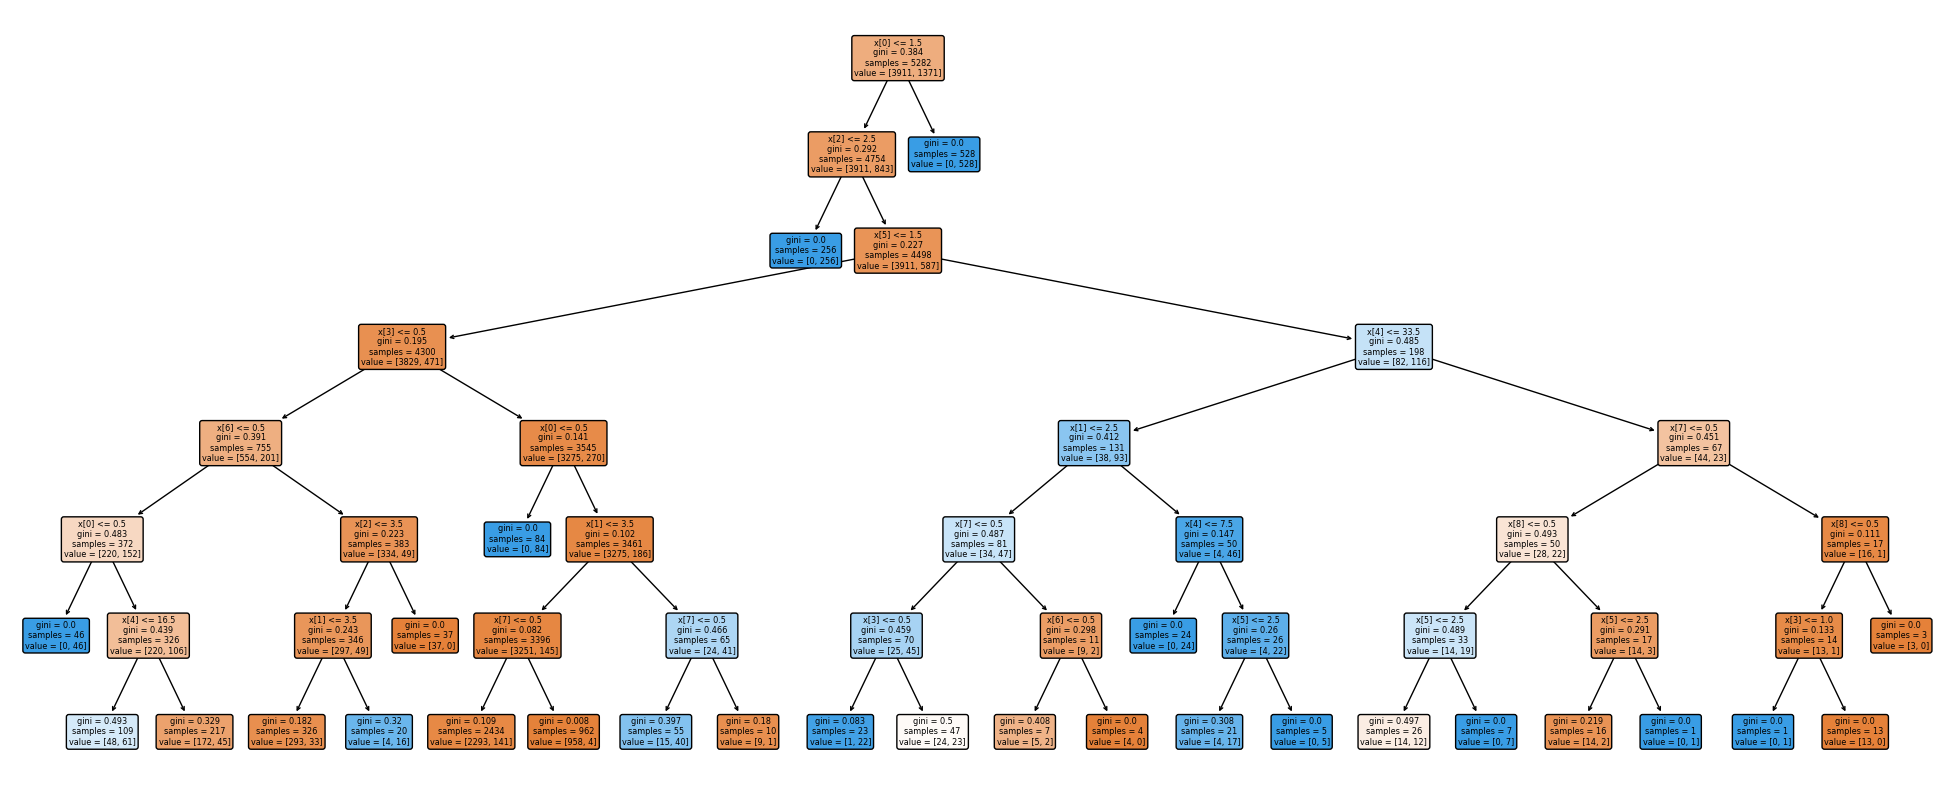

In [157]:
# Plotting the best_model
plt.figure(figsize=(25,10))
plot_tree(best_model,feature_names=None,class_names=None,filled=True,rounded=True)

Observations: This is the DecisionTree we get after doing prepruning and then plotting the best_model.

### Random Forest Classifier

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [159]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
X=final_df.drop('Churn Status', axis=1)
X

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
0,1,5,3.0,2,1,0,0,0,0,1
1,1,5,3.0,0,8,0,0,1,0,1
2,1,1,3.0,2,18,0,1,1,0,1
3,2,1,2.0,2,25,1,0,1,0,1
4,4,1,2.0,0,37,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,3.0,2,72,0,0,0,0,0
7039,1,2,3.0,1,24,0,1,1,1,1
7040,1,2,4.0,0,72,0,0,1,0,1
7041,1,0,3.0,1,11,0,1,1,1,1


In [161]:
y=final_df['Churn Status']
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=40)

In [163]:
X_train

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
3449,1,2,5.0,2,45,0,0,1,0,0
6407,1,0,3.0,0,61,0,1,0,1,1
3102,1,2,3.0,0,51,0,1,0,1,1
6338,1,1,4.0,2,56,0,0,1,0,1
884,1,2,3.0,1,31,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
3064,1,0,3.0,2,61,0,1,0,0,1
6309,1,0,3.0,1,39,0,1,1,0,1
6151,1,0,3.0,1,22,0,1,0,0,1
6363,1,0,3.0,2,53,0,0,0,0,0


In [164]:
X_test

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
2180,1,0,3.0,0,19,0,0,0,0,1
365,1,0,3.0,1,15,0,0,0,0,1
45,1,4,3.0,0,30,1,0,0,1,1
6149,1,2,4.0,2,58,0,0,0,0,0
5057,1,0,3.0,2,39,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
597,1,0,3.0,2,61,0,1,0,0,1
199,2,1,3.0,2,1,0,0,0,0,0
2129,1,3,3.0,0,39,0,0,0,1,1
2385,1,1,1.0,1,1,2,0,0,0,1


In [165]:
y_train

3449    0
6407    0
3102    0
6338    0
884     0
       ..
3064    0
6309    0
6151    0
6363    0
3398    0
Name: Churn Status, Length: 5282, dtype: int64

In [166]:
y_test

2180    1
365     1
45      1
6149    0
5057    0
       ..
597     0
199     1
2129    1
2385    1
4494    0
Name: Churn Status, Length: 1761, dtype: int64

In [167]:
# Creating RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_features='sqrt',random_state=0)

# Training the model on the training data
rfc.fit(X_train,y_train)

# Making the predictions on the test data
y_pred=rfc.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

### Evaluation

In [169]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.9420783645655877


Observations: Using the default RandomForestClassifier we get the accuracy score as 94%.

In [170]:
confusion_matrix(y_test,y_pred)

array([[1271,   49],
       [  53,  388]], dtype=int64)

Observations:

TN: 1271 (instances correctly predicted as class 0)  
FN: 112 (instances incorrectly predicted as class 0)   
FP: 79 (instances incorrectly predicted as class 1)    
TP: 388 (instances correctly predicted as class 1) 

In [171]:
rep=classification_report(y_test,y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1320
           1       0.89      0.88      0.88       441

    accuracy                           0.94      1761
   macro avg       0.92      0.92      0.92      1761
weighted avg       0.94      0.94      0.94      1761



Observations:

Precision for class 0: 96%  
Precision for class 1: 89%  

Recall for class 0: 96%  
Recall for class 1: 88%  

F1-score for class 0: 96%  
F1-score for class 1: 88%  

Support for class 0: 1320  
Support for class 1: 441

Accuracy: 94%

### Gradient Boosting

In [172]:
## Applying Gradient Boosting
gradboost=GradientBoostingClassifier(n_estimators=100)
gradboost.fit(X_train,y_train)
y_pred=gradboost.predict(X_test)

In [174]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.9568427030096536


Observations: Using the GradientBoosting, we get the accuracy score as 95%.

In [267]:
confusion_matrix(y_test,y_pred)

array([[1299,   21],
       [  55,  386]], dtype=int64)

Observations:

TN: 1299 (instances correctly predicted as class 0)  
FN: 55 (instances incorrectly predicted as class 0)   
FP: 21 (instances incorrectly predicted as class 1)    
TP: 386 (instances correctly predicted as class 1) 

In [175]:
rep=classification_report(y_test,y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1320
           1       0.95      0.88      0.91       441

    accuracy                           0.96      1761
   macro avg       0.95      0.93      0.94      1761
weighted avg       0.96      0.96      0.96      1761



Observations:

Precision for class 0: 96%  
Precision for class 1: 95%  

Recall for class 0: 98%  
Recall for class 1: 88%  

F1-score for class 0: 97%  
F1-score for class 1: 91%  

Support for class 0: 1320  
Support for class 1: 441

Accuracy: 96%

### XGboost


In [176]:
## Applying XGboost
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

In [177]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.948892674616695


Observations: Using the XGBoosting, we get the accuracy score as 95%.

In [178]:
confusion_matrix(y_test,y_pred)

array([[1288,   32],
       [  58,  383]], dtype=int64)

Observations:

TN: 1288 (instances correctly predicted as class 0)  
FN: 58 (instances incorrectly predicted as class 0)   
FP: 32 (instances incorrectly predicted as class 1)    
TP: 383 (instances correctly predicted as class 1) 

In [179]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1320
           1       0.92      0.87      0.89       441

    accuracy                           0.95      1761
   macro avg       0.94      0.92      0.93      1761
weighted avg       0.95      0.95      0.95      1761



Observations:

Precision for class 0: 96%  
Precision for class 1: 92%  

Recall for class 0: 98%  
Recall for class 1: 87%  

F1-score for class 0: 97%  
F1-score for class 1: 89%  

Support for class 0: 1320  
Support for class 1: 441

Accuracy: 95%

### Support Vector Machine

In [180]:
X=final_df.drop('Churn Status', axis=1)
X

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
0,1,5,3.0,2,1,0,0,0,0,1
1,1,5,3.0,0,8,0,0,1,0,1
2,1,1,3.0,2,18,0,1,1,0,1
3,2,1,2.0,2,25,1,0,1,0,1
4,4,1,2.0,0,37,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,3.0,2,72,0,0,0,0,0
7039,1,2,3.0,1,24,0,1,1,1,1
7040,1,2,4.0,0,72,0,0,1,0,1
7041,1,0,3.0,1,11,0,1,1,1,1


In [181]:
y=final_df["Churn Status"]
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=52)

In [183]:
X_train

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
5731,1,0,3.0,1,47,0,0,0,0,1
1314,1,0,3.0,1,6,0,0,0,0,1
637,1,0,3.0,1,65,0,1,0,0,1
37,1,1,2.0,1,43,1,1,0,0,1
2274,0,4,3.0,0,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
924,1,1,3.0,1,36,1,1,0,0,1
6230,1,0,3.0,2,12,0,0,0,0,0
4247,1,1,3.0,0,66,0,1,1,0,1
2827,1,0,3.0,1,60,0,0,0,0,1


In [184]:
X_test

,Churn Category,Total Customer Svc Requests,Customer Satisfaction rate,Internet Type,Tenure in Months,Product/Service Issues Reported,Unlimited Data,Dependents,Online Security,Internet Service
3987,1,0,3.0,2,8,0,0,0,0,0
3018,1,1,3.0,2,70,2,1,0,1,1
6942,1,0,3.0,2,32,0,1,1,1,1
6432,1,0,3.0,2,61,0,0,0,1,1
6905,1,1,3.0,1,4,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
873,1,1,3.0,1,46,0,1,0,0,1
5263,1,1,5.0,2,16,0,0,0,0,0
6183,1,1,3.0,1,5,0,1,0,0,1
688,1,0,3.0,1,72,0,1,0,1,1


In [185]:
y_train

5731    0
1314    1
637     0
37      1
2274    1
       ..
924     0
6230    0
4247    0
2827    0
1692    1
Name: Churn Status, Length: 5282, dtype: int64

In [186]:
y_test

3987    0
3018    0
6942    0
6432    0
6905    0
       ..
873     0
5263    0
6183    0
688     0
752     0
Name: Churn Status, Length: 1761, dtype: int64

In [187]:
from sklearn.svm import SVC

In [188]:
# Model creation
model=SVC(kernel='rbf',C=3) # This can be changed accordingly

In [189]:
# Training the model on training data
model.fit(X_train,y_train)

SVC(C=3)

In [190]:
# Making the predictions on the test data
y_pred=model.predict(X_test)
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

### Evaluation

In [191]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [192]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.902328222600795


Observations: Using the default Support Vector Machine we get the accuracy score as 90%.

In [193]:
confusion_matrix(y_test,y_pred)

array([[1267,   21],
       [ 151,  322]], dtype=int64)

Observations:

TN: 1267 (instances correctly predicted as class 0)  
FN: 151 (instances incorrectly predicted as class 0)   
FP: 21 (instances incorrectly predicted as class 1)    
TP: 322 (instances correctly predicted as class 1) 

In [195]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1288
           1       0.94      0.68      0.79       473

    accuracy                           0.90      1761
   macro avg       0.92      0.83      0.86      1761
weighted avg       0.91      0.90      0.90      1761



Observations:

Precision for class 0: 89%  
Precision for class 1: 94%  

Recall for class 0: 98%  
Recall for class 1: 68%  

F1-score for class 0: 94%  
F1-score for class 1: 79%  

Support for class 0: 1288  
Support for class 1: 473

Accuracy: 90%

#### Doing Hyper parameter tuning

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
# Define hyper parameter grid to search
param_grid={
    'C':[0.1,1,2,3,10],
    'gamma':['scale','auto']
}

In [198]:
# Create GridSearchCV with cross Validation
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,scoring='f1_macro',cv=5)

In [199]:
# Fit gridsearchcv to training data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=3),
             param_grid={'C': [0.1, 1, 2, 3, 10], 'gamma': ['scale', 'auto']},
             scoring='f1_macro')

In [200]:
# Get best hyper parameter 
best_params=grid_search.best_params_
best_params

{'C': 10, 'gamma': 'auto'}

In [202]:
# Get the best f1_score achieved during cross validation
best_f1_score=grid_search.best_score_
print('Best F1 Score=', best_f1_score)

Best F1 Score= 0.9045445010425551


In [203]:
# Get the best trained model
best_model=grid_search.best_estimator_
best_model

SVC(C=10, gamma='auto')

In [204]:
# Creaing a model using best_model
model=SVC(C=10,gamma='auto')

In [205]:
# Training the model on training data
model.fit(X_train,y_train)

SVC(C=10, gamma='auto')

In [206]:
# making predictions
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

In [207]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.9290176036342986


Observations: Using the hyper parameter in SVC we get the accuracy score as 93%, where in default SVC it was 90%.

In [208]:
confusion_matrix(y_test,y_pred)

array([[1265,   23],
       [ 102,  371]], dtype=int64)

Observations:

TN: 1265 (instances correctly predicted as class 0)  
FN: 102 (instances incorrectly predicted as class 0)   
FP: 23 (instances incorrectly predicted as class 1)    
TP: 371 (instances correctly predicted as class 1) 

In [209]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1288
           1       0.94      0.78      0.86       473

    accuracy                           0.93      1761
   macro avg       0.93      0.88      0.90      1761
weighted avg       0.93      0.93      0.93      1761



Observations:

Precision for class 0: 93%  
Precision for class 1: 94%  

Recall for class 0: 98%  
Recall for class 1: 78%  

F1-score for class 0: 95%  
F1-score for class 1: 86%  

Support for class 0: 1288  
Support for class 1: 473

Accuracy: 93%

### KNN

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
# Creating model
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski') #Can be chaned accordingly

In [212]:
# Training the model on the training data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [213]:
# Predicting the model on the test data
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

In [215]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.8955139125496877


Observations: Using the default KNN we get the accuracy score as 90%.

In [217]:
confusion_matrix(y_test,y_pred)

array([[1257,   31],
       [ 153,  320]], dtype=int64)

Observations:

TN: 1257 (instances correctly predicted as class 0)  
FN: 153 (instances incorrectly predicted as class 0)   
FP: 31 (instances incorrectly predicted as class 1)    
TP: 320 (instances correctly predicted as class 1) 

In [218]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1288
           1       0.91      0.68      0.78       473

    accuracy                           0.90      1761
   macro avg       0.90      0.83      0.85      1761
weighted avg       0.90      0.90      0.89      1761



Observations:

Precision for class 0: 89%  
Precision for class 1: 91%  

Recall for class 0: 98%  
Recall for class 1: 68%  

F1-score for class 0: 93%  
F1-score for class 1: 78%  

Support for class 0: 1288  
Support for class 1: 473

Accuracy: 90%

#### Doing Hyper parameter on KNN

In [219]:
# Creating knn classifier
knn=KNeighborsClassifier()

In [220]:
# define the hyper parameter
param_grid={
    'n_neighbors':[3,5,7,9,11],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [221]:
# Create gridsearchcv object
grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,scoring='accuracy',cv=5)

In [222]:
# Fit the gridsearchcv object on the training data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='accuracy')

In [223]:
# Get the best hyper parameter
best_params=grid_search.best_params_
best_params

{'algorithm': 'brute', 'n_neighbors': 3}

In [224]:
# Get the best trained model
best_model=grid_search.best_estimator_
best_model

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [225]:
# creating KNN model using best_model
knn=KNeighborsClassifier(algorithm='brute',n_neighbors=3)

In [226]:
# Training model with training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [227]:
# Make predictions on the test data using the best_model
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

In [228]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.9011925042589438


Observations: Using the hyper parameter in KNN we get the accuracy score as 90%, while with deafult KNN it accuracy was 89.5%.

In [229]:
confusion_matrix(y_test,y_pred)

array([[1257,   31],
       [ 143,  330]], dtype=int64)

Observations:

TN: 1257 (instances correctly predicted as class 0)  
FN: 143 (instances incorrectly predicted as class 0)   
FP: 31 (instances incorrectly predicted as class 1)    
TP: 330 (instances correctly predicted as class 1) 

In [230]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1288
           1       0.91      0.70      0.79       473

    accuracy                           0.90      1761
   macro avg       0.91      0.84      0.86      1761
weighted avg       0.90      0.90      0.90      1761



Observations:

Precision for class 0: 90%  
Precision for class 1: 91%  

Recall for class 0: 98%  
Recall for class 1: 70%  

F1-score for class 0: 94%  
F1-score for class 1: 79%  

Support for class 0: 1288  
Support for class 1: 473

Accuracy: 90%

In [232]:
final_df.columns

Index(['Churn Category', 'Total Customer Svc Requests',
       'Customer Satisfaction rate', 'Internet Type', 'Tenure in Months',
       'Product/Service Issues Reported', 'Unlimited Data', 'Dependents',
       'Online Security', 'Internet Service', 'Churn Status'],
      dtype='object')

## Visualization of the Dependent Varaibles with respect to the Target Variable

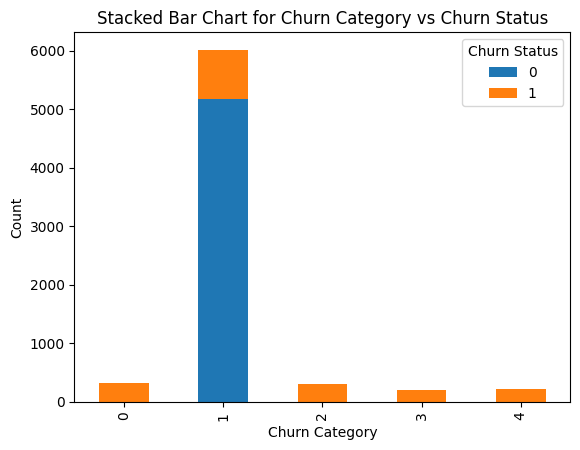

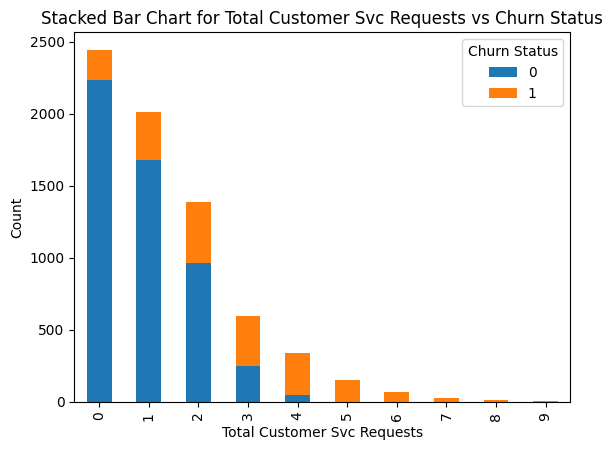

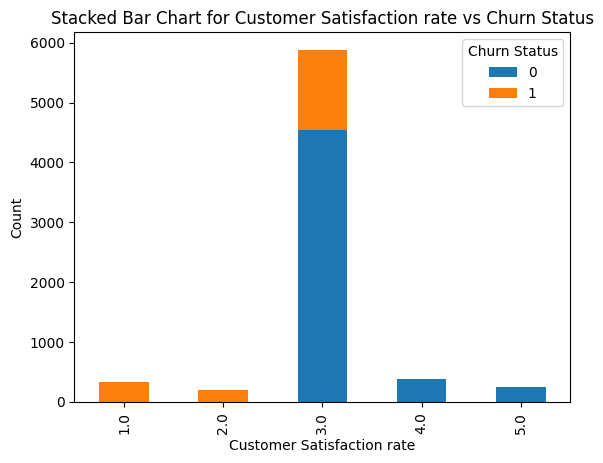

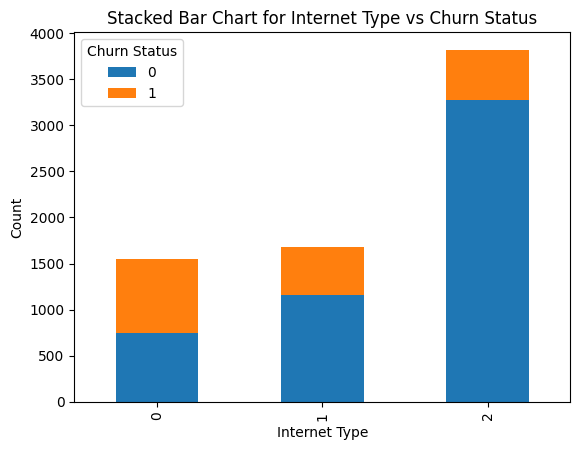

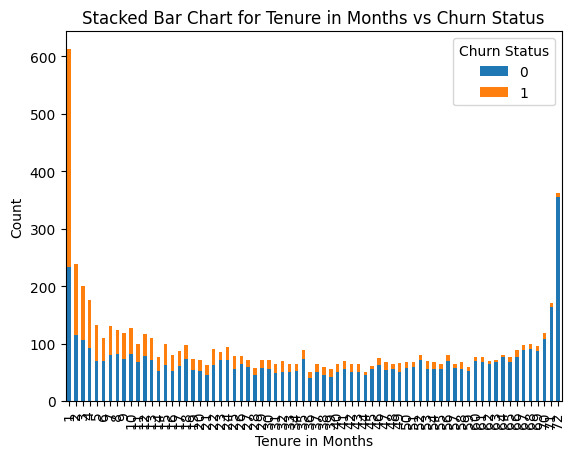

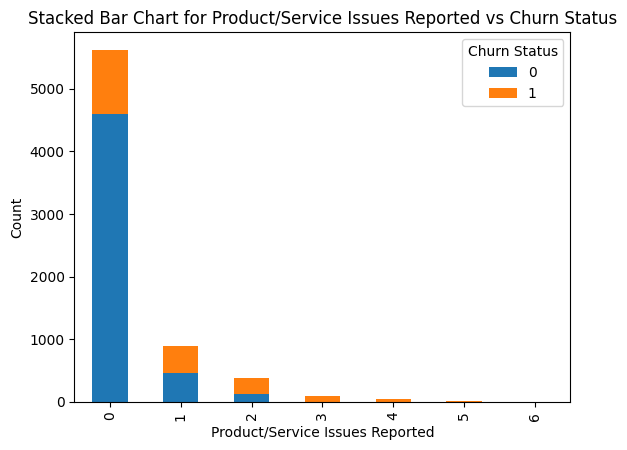

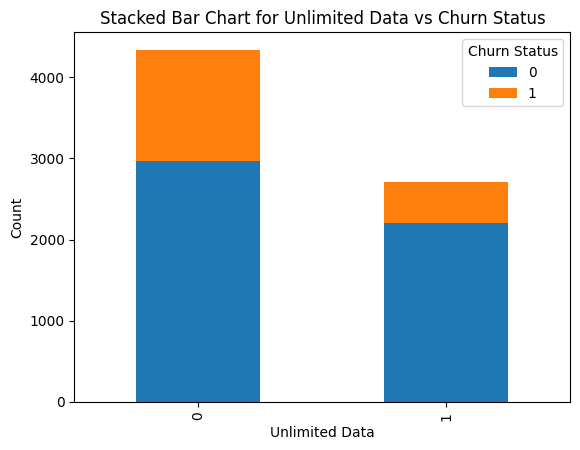

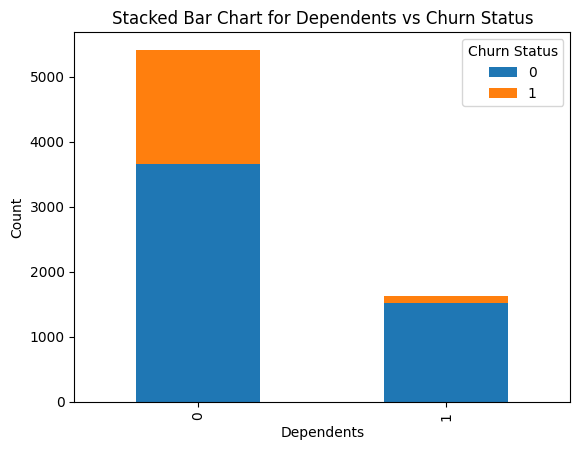

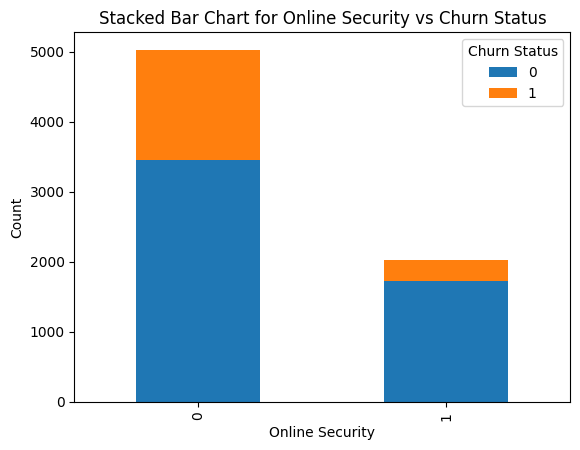

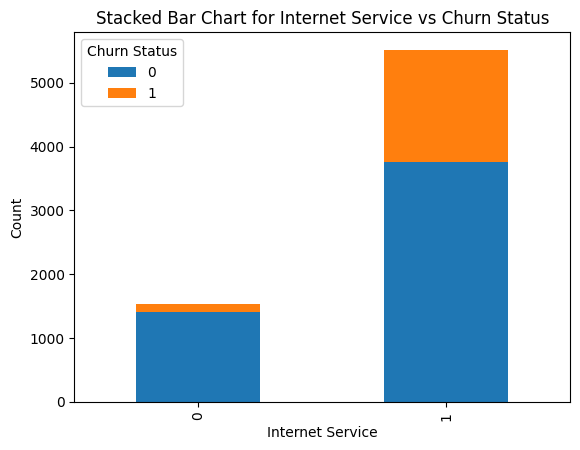

In [243]:
dependent_features = ['Churn Category', 'Total Customer Svc Requests', 'Customer Satisfaction rate', 
                      'Internet Type', 'Tenure in Months','Product/Service Issues Reported', 
                      'Unlimited Data', 'Dependents', 'Online Security', 'Internet Service']

for feature in dependent_features:
    ct = pd.crosstab(final_df[feature], final_df["Churn Status"])
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Stacked Bar Chart for {feature} vs Churn Status")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

Observations: We have plotted a Stacked Bar Chart for all selected dependent features against the target variable. The observations from the visual are:

1. Churn Category   
The customers tends to churn because the 'Competition' from the other companies. They gave more data, better offer, higher download speed etc to our customers. Higher number of customers are in the Churn Category of Competition. From this customers almost 1000 have churned already. There are almost 5000 customers in the same category of 'Competitor'. In all the other category like 'Dissatisfaction', 'Price' etc, there are less number of customers.

##### To prevent the customers from churning due to competition, we need to provide more data, better offers, higher download speeds, good network speed, etc at a very aggressive price when compared to our competitors.
    


2. Total Customer SVC Requests  
    From the visual we can understand that as the customer svc request increases, the number of customers discontinuing the service also increases. In the case of 0 svc request, we can see that only around 200 customers has discontinued from a total of almost 2500 customers. But incase of customers who have raised 1 service request, almost 2000 customers raised service request and out of them around 500 customers have discontinued the service. Incase of 2 svc request, more than 400 customers have discontinued the service out of around 1400 customers. Incase of 3 and 4 svc request, half of customers who raised request has discontinued while the remaining half has decided to continue as of now. In the remaining cases of 5-9 svc, all of them have decided to discontinue their service.    

##### From the observation it is clear that we are week in dealing with the svc requests our customer raises. To prevent our customers from churning due to this reason, we have to focus on solving their svc request as soon as we recieve the svc requests from them. Else there are chances that we will loose customers in the future also.

3. Customer Satisfaction Rate  
    From the total number of customers we are having, a very high number of them have given a rating of 3. Rating 1, 2, 4, 5 almost same which is less than 500 only. We can understand that our ratings are only average. This might be because of many reasons like our customer relations, offers, data speed, network etc.
    
##### Inorder to make our customers stay, we need to provide them with the above mentioned things and make them rate our service higher than the present ratings.    

4. Internet Type  
Most of our customers use Fiber as their internet type, followed by DSL and Cable. There are almost 4000 customers who use our Fiber network. From these customers almost 1000 have decided to discontinue our service and settle for other service providers. Out of around 1500 customers who use DSL, almost 500 have opted to discontinue our service and move to other service providers. And from 1500 customers who make use of our Cable network, almost 750 of them have decided part their ways with our services. This is huge number of customer attrition when compared to DSL and Fiber network. Since Cable network is old and out dated model, the service they get might of poor quality like lack of proper complaint addressing, low network quality, low data speed etc. This might be the reason that high number of customers who use Cable network have discontinued.

##### Maintaining an out dated service is not neccessary for our company and might be more costly. So inorder to prevent the attrition of these particular customers, it would be advisible to market our Fiber network to these customers and make them realise that Fiber network is more efficient in all the aspects and available at a decent price. Changing their network type to Optical network can reduce the attrition drastically. 

5. tenure in Months  
From the plot it is clear that that higher number of customers have less tenure with our service and this category is having a very high attrition rate. Out of the 600 customers in this category, more than half of them have churned. This trend is followed by the nearby tenures also and we can see the trend of attrition goes down as the tenure in months gets increasing or is more.The customers who have more Tenure with our service tends to continue the service later on also. So we can conclude that lesser the Tenure, more the customers tends to discontinue.

##### To tackle down attrition due to the Tenure, the best way is to provide the customers with very good services in all aspects and make them take higher Tenure offers with us at a very aggressive pricing.  

6. Product/Service Issues Reported  
We can almost similar trend to that of 'Total Customer SVC Request'. Most of our customers didn't report any issues but still some of them have churned. When it comes to issue report equal to 1, almost half of them discontinued and that goes same or even worse for issue report=2. For issues reported equal to 3, 4, 5, 6 almost all of them or all of them have decided to discontinue.

##### The solution is to make our issue addressing department more attending and welcoming when the customers are having issues with the product or services and clear all the problems as fast as possible.

7. Unlimited Data  
More than 4000 of our customers opted not to take unlimited data. From this customers more than 1000 have opted to discontinue our service while 3000 of them continued with our service. Almost 3000 customers are making use of our unlimited data service and only less than 500 have discontinued and more than 2000 of stayed with our service. From this it is clear that more number have discontinued from those who does not use our unlimited data service.

##### Inorder to prevent this customer attrition, we need to make the customers think to upgrade their data from normal to unlimited. For this we need to provide them with unlimited data service at a descent package rate, which when compared to the normal package, the customers have to think that unlimited is far better than normal package when compared to their pricing. This way we can upgrade the customers to unlimited data service and therefore making less attracted  to our competitors packages.

8. Dependents  
From the visual it is clear that more 5000 of customers are independent on others. From this customer set, around 1500 of them have opted to discontinue our services and join other service providers, while more than 3500 have decided to stick on to the service we provide. This means that around 1/3 of our customers who are not dependents discontinued our services.   
We also have more than 1500 customers who are dependents. This maybe family connected to a primary account holder, or can be employees of any business account. From this set of customers only around 100 of them have discontinued our service and more than 1300 have decided to continue with our service.  
##### From this we can understand the dependent customers highly tends to stay  with our service than the other customer set. So we need to convert the not dependent customers to dependent customers by introducing; 
###### New Family plans - Introduce new family plans that allow multiple connections under a single account. So if the family is satisified with our service, then none of them will opt to churn from our service  
###### New Employee plans for business account - This also works like the family plan. All we have to do is to provide more features like shared billing and discount, which can help the customers in cost savings.  Good service quality and network coverage is also an important matter we need to look into. If there rises a regular problems like service quality, network coverage, data speed, the churn rate of customers will increase highly since they will be dependent on other accounts.

9. Online Security 
Out of our total customers 5000 of them don't have Online Security and out of them around 1500 have discontinued the service and 3000 have stayed with us. The number is very high that 1/3 of them have churned. When it comes to customers who opted Online Security, out of around 2000 customers only around 100 have churned which is very less in numbers when compared to churn rate of customers who have not opted for Online Security.  
###### First we need to make people know about Online Security features and make them aware of need of online Security sevices. Some of them might not know of our online security service. We can see that those who have opted our Online Security are continuing with our services. So we need to make the other customers use our features. When there increases the number of such customers, we need to technically ready to tackle down any future issues like breach of security etc, so that the customers rely more on our Online Security in the future also.

9. Online Security 
Out of our total customers 5000 of them don't have Online Security and out of them around 1500 have discontinued the service and 3000 have stayed with us. The number is very high that 1/3 of them have churned. When it comes to customers who opted Online Security, out of around 2000 customers only around 100 have churned which is very less in numbers when compared to churn rate of customers who have not opted for Online Security.  
###### First we need to make people know about Online Security features and make them aware of need of online Security sevices. Some of them might not know of our online security service. We can see that those who have opted our Online Security are continuing with our services. So we need to make the other customers use our features. When there increases the number of such customers, we need to technically ready to tackle down any future issues like breach of security etc, so that the customers rely more on our Online Security in the future also.

# Conclusion
### If we are able to take care of dealing with above mentioned problems and issues and provide our customers with best possoble services in those departments or areas, we can reduce the attrition of our customers to very hgih rate and make them our true loyal customers. Also, if they are really excited and happy with our services we provide and if they can reffer new members to our service, we could appreciate both the parties with some offers like cashback or redeemable vouchers as our token of loyalty and respect. This could easily attract new customers to our service while reataining our present customers. 
### We need to make sure that all of these are taken care of at all the time without any failure and at very aggressive price that our customers do not think of discontinuing ever.